# Agents

AutoGen AgentChat provides a set of preset Agents, each with variations in how an agent might respond to messages. All agents share the following attributes and methods:

- [name](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.BaseChatAgent.name): The unique name of the agent.
- [description](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.BaseChatAgent.description): The description of the agent in text.
- [run](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.BaseChatAgent.run): The method that runs the agent given a task as a string or a list of messages, and returns a TaskResult. **Agents are expected to be stateful and this method is expected to be called with new messages, not complete history.**
- [run_stream](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.BaseChatAgent.run_stream): Same as `run()` but returns an iterator of messages that subclass [BaseAgentEvent](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.BaseAgentEvent) or [BaseChatMessage](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.BaseChatMessage) followed by a [TaskResult](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.base.html#autogen_agentchat.base.TaskResult) as the last item.

See [autogen_agentchat.messages](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#module-autogen_agentchat.messages) for more information on AgentChat message types.

## Available Agents

The following preset agents are available:

- [UserProxyAgent](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.UserProxyAgent): An agent that takes user input returns it as responses.

- [CodeExecutorAgent](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.CodeExecutorAgent): An agent that can execute code.

- [OpenAIAssistantAgent](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.agents.openai.html#autogen_ext.agents.openai.OpenAIAssistantAgent): An agent that is backed by an OpenAI Assistant, with ability to use custom tools.

- [MultimodalWebSurfer](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.agents.web_surfer.html#autogen_ext.agents.web_surfer.MultimodalWebSurfer): A multi-modal agent that can search the web and visit web pages for information.

- [FileSurfer](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.agents.file_surfer.html#autogen_ext.agents.file_surfer.FileSurfer): An agent that can search and browse local files for information.

- [VideoSurfer](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.agents.video_surfer.html#autogen_ext.agents.video_surfer.VideoSurfer): An agent that can watch videos for information.

In [1]:
import os

from dotenv import load_dotenv

load_dotenv()

MODEL_NAME = "gpt-4.1-nano"

## Assistant Agent

[AssistantAgent](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.AssistantAgent) is a built-in agent that uses a language model and has the ability to use tools.

The following diagram shows how the assistant agent works:

<p align="center">
  <img src="https://microsoft.github.io/autogen/stable/_images/assistant-agent.svg" alt="img">
</p>

**⚠️ Warning**: *`AssistantAgent` is a “kitchen sink” agent for prototyping and educational purpose – it is very general. Make sure you read the documentation and implementation to understand the design choices. Once you fully understand the design, you may want to implement your own agent. See [Custom Agent](https://microsoft.github.io/autogen/stable/user-guide/agentchat-user-guide/custom-agents.html).*

### Getting Result

We can use the `run()` method to get the agent run on a given task.

The call to the [run()](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.BaseChatAgent.run) method returns a [TaskResult](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.base.html#autogen_agentchat.base.TaskResult) with the list of [messages](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.base.html#autogen_agentchat.base.TaskResult.messages) in the messages attribute, which stores the agent’s “thought process” as well as the final response.

**⚠️ Warning**: *It is important to note that `run()` will update the internal state of the agent – it will add the messages to the agent’s message history. You can also call `run()` without a task to get the agent to generate responses given its current state*

In [2]:
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import OpenAIChatCompletionClient

In [3]:
# Define mock function tool that searches the web for information
async def web_search(query:str)->str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."

In [4]:
# Create model client
model_client = OpenAIChatCompletionClient(
    model=MODEL_NAME,
    api_key=os.getenv("OPENAI_API_KEY")
)

# Create agent
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)

In [6]:
# Use asyncio.run(agent.run(...)) when running a script.
res = await agent.run(task="Find information about Autogen")
res

TaskResult(messages=[TextMessage(id='a99cde28-f9d9-492d-8ab6-a4a99281ea62', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 27, 5, 50, 55, 460955, tzinfo=datetime.timezone.utc), content='Find information about Autogen', type='TextMessage'), ToolCallRequestEvent(id='18b3d80b-fc08-4d15-bdcd-ce09823e59ef', source='assistant', models_usage=RequestUsage(prompt_tokens=103, completion_tokens=15), metadata={}, created_at=datetime.datetime(2025, 7, 27, 5, 50, 56, 349190, tzinfo=datetime.timezone.utc), content=[FunctionCall(id='call_ydpVdSxjF4M7JMeUNiw9YxsU', arguments='{"query":"Autogen"}', name='web_search')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(id='1452fda9-8eab-42a6-8087-73fc657ebb99', source='assistant', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 27, 5, 50, 56, 349550, tzinfo=datetime.timezone.utc), content=[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent application

In [12]:
#res.dict()
#res.model_dump()
for msg in res.messages:
    print(f"Type: {msg.type} Source: {msg.source} ({msg.id})")
    print(f"Conent:\n{msg.content}")
    print("-"*10)

Type: TextMessage Source: user (a99cde28-f9d9-492d-8ab6-a4a99281ea62)
Conent:
Find information about Autogen
----------
Type: ToolCallRequestEvent Source: assistant (18b3d80b-fc08-4d15-bdcd-ce09823e59ef)
Conent:
[FunctionCall(id='call_ydpVdSxjF4M7JMeUNiw9YxsU', arguments='{"query":"Autogen"}', name='web_search')]
----------
Type: ToolCallExecutionEvent Source: assistant (1452fda9-8eab-42a6-8087-73fc657ebb99)
Conent:
[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_ydpVdSxjF4M7JMeUNiw9YxsU', is_error=False)]
----------
Type: ToolCallSummaryMessage Source: assistant (2a8a9e57-532f-4f7c-b80a-56029aeafb76)
Conent:
AutoGen is a programming framework for building multi-agent applications.
----------


Here are the key differences between the `run()` method and the `on_message()` method in `BaseChatAgent`:

`on_messages()` method:
- **Purpose**: Core message handling logic that agents must implement
- **Input**: Takes a sequence of BaseChatMessage objects directly
- **Usage**: Called internally by teams during conversation flows
- **Returns**: A Response object containing the agent's reply
- **Abstract method**: Must be implemented by all concrete agents

`run()` method:
- **Purpose**: High-level interface for running agents with tasks
- **Input**: More flexible - accepts strings, single messages, or sequences of messages
- **Usage**: External interface for directly invoking agents
- **Returns**: A TaskResult object with complete conversation history
- **Concrete implementation**: Already provided by BaseChatAgent

### Multi-Modal Input

The [AssistantAgent](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.AssistantAgent) can handle multi-modal input by providing the input as a [MultiModalMessage](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.MultiModalMessage).


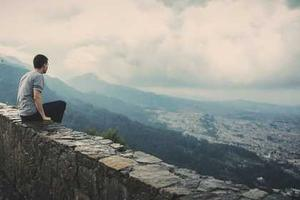

In [13]:
import PIL
import requests
from io import BytesIO
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img

In [14]:
res = await agent.run(task=multi_modal_message)
print(res.messages[-1].content)

This image shows a person sitting on a stone wall, overlooking a vast landscape that includes mountains and a city or town below. The scene appears to be peaceful and contemplative, with the individual gazing at the view. The sky is partly cloudy, adding a serene atmosphere to the setting.


### Streaming Messages

We can also stream each message as it is generated by the agent by using the [run_stream()](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.BaseChatAgent.run_stream) method, and use [Console](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.ui.html#autogen_agentchat.ui.Console) (consumes the message stream from `run_stream()` or `on_messages_stream()` and renders the messages to the console.) to print the messages as they appear to the console.

The [run_stream()](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.BaseChatAgent.run_stream) method returns an asynchronous generator that yields each message generated by the agent, followed by a [TaskResult](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.base.html#autogen_agentchat.base.TaskResult) as the last item.

From the messages, you can observe that the assistant agent utilized the `web_search` tool to gather information and responded based on the search results.

In [15]:
from autogen_agentchat.ui import Console

In [16]:
async def assistant_run_stream() -> None:
    # Option 1: read each message from the stream (as shown in the previous example).
    # async for message in agent.run_stream(task="Find information on AutoGen"):
    #     print(message)

    # Option 2: use Console to print all messages as they appear.
    await Console(
        agent.run_stream(task="Find information on AutoGen"),
        output_stats=True,  # Enable stats printing.
    )

# Use asyncio.run(assistant_run_stream()) when running in a script.
await assistant_run_stream()

---------- TextMessage (user) ----------
Find information on AutoGen
---------- ToolCallRequestEvent (assistant) ----------
[FunctionCall(id='call_620bOd7nTGoWC0NPp6hLdKcN', arguments='{"query": "AutoGen programming framework"}', name='web_search'), FunctionCall(id='call_cfASH4TvDekZsadtQE00AQ6M', arguments='{"query": "features of AutoGen"}', name='web_search')]
[Prompt tokens: 398, Completion tokens: 50]
---------- ToolCallExecutionEvent (assistant) ----------
[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_620bOd7nTGoWC0NPp6hLdKcN', is_error=False), FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_cfASH4TvDekZsadtQE00AQ6M', is_error=False)]
---------- ToolCallSummaryMessage (assistant) ----------
AutoGen is a programming framework for building multi-agent applications.
AutoGen is a programming frame

### Using Tools and Workbench

In AgentChat, the [AssistantAgent](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.AssistantAgent) can use tools to perform specific actions. The `web_search` tool is one such tool that allows the assistant agent to search the web for information. A single custom tool can be a Python function or a subclass of the [BaseTool](https://microsoft.github.io/autogen/stable/reference/python/autogen_core.tools.html#autogen_core.tools.BaseTool).

On the other hand, a [Workbench](https://microsoft.github.io/autogen/stable/reference/python/autogen_core.tools.html#autogen_core.tools.Workbench) is a collection of tools that share state and resources.

AutoGen Extension provides a set of built-in tools that can be used with the Assistant Agent. Head over to the API documentation for all the available tools under the `autogen_ext.tools` namespace. For example, you can find the following tools:
- [graphrag](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.tools.graphrag.html#module-autogen_ext.tools.graphrag): Tools for using GraphRAG index.
- [http](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.tools.http.html#module-autogen_ext.tools.http): Tools for making HTTP requests.
- [langchain](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.tools.langchain.html#module-autogen_ext.tools.langchain): Adaptor for using LangChain tools.
- [mcp](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.tools.mcp.html#module-autogen_ext.tools.mcp): Tools and workbench for using Model Chat Protocol (MCP) servers.


The `AssistantAgent` automatically converts a Python function into a [FunctionTool](https://microsoft.github.io/autogen/stable/reference/python/autogen_core.tools.html#autogen_core.tools.FunctionTool) which can be used as a tool by the agent and automatically generates the tool schema from the function signature and docstring.

The `web_search_func` tool is an example of a function tool. The schema is automatically generated.

In [17]:
from autogen_core.tools import FunctionTool

# Define a tool using a Python function.
async def web_search_func(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."

# This step is automatically performed inside the AssistantAgent if the tool is a Python function.
web_search_function_tool = FunctionTool(web_search_func,
                                        description="Find information on the web"
                                       )

# The schema is provided to the model during AssistantAgent's on_messages call.
web_search_function_tool.schema

{'name': 'web_search_func',
 'description': 'Find information on the web',
 'parameters': {'type': 'object',
  'properties': {'query': {'description': 'query',
    'title': 'Query',
    'type': 'string'}},
  'required': ['query'],
  'additionalProperties': False},
 'strict': False}

The [AssistantAgent](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.AssistantAgent) can also use tools that are served from a Model Context Protocol (MCP) server using [McpWorkbench()](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.tools.mcp.html#autogen_ext.tools.mcp.McpWorkbench).

In [ ]:
from autogen_ext.tools.mcp import McpWorkbench, StdioServerParams

# Get the fetch tool from mcp-server-fetch.
fetch_mcp_server = StdioServerParams(command="uvx", args=["mcp-server-fetch"])

# Create an MCP workbench which provides a session to the mcp server.
async with McpWorkbench(fetch_mcp_server) as workbench:

    fetch_agent = AssistantAgent(name="fetcher",
                                 model_client=model_client,
                                 workbench=workbench,
                                 reflect_on_tool_use=True
                                )
    
    # Let the agent fetch the content of a URL and summarize it.
    result = await fetch_agent.run(task="Summarize the content of https://en.wikipedia.org/wiki/Seattle")
    assert isinstance(result.messages[-1], TextMessage)
    print(result.messages[-1].content)

    # Close the connection to the model client.
    await model_client.close()

### Agent as a Tool

Any [BaseChatAgent](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.BaseChatAgent) can be used as a tool by wrapping it in a [AgentTool](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.tools.html#autogen_agentchat.tools.AgentTool). This allows for a dynamic, model-driven multi-agent workflow where the agent can call other agents as tools to solve tasks.

### Parallel Tool Calls

Some models support parallel tool calls, which can be useful for tasks that require multiple tools to be called simultaneously. **By default, if the model client produces multiple tool calls, [AssistantAgent](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.AssistantAgent) will call the tools in parallel.**

You may want to disable parallel tool calls when the tools have side effects that may interfere with each other, or, when agent behavior needs to be consistent across different models. This should be done at the model client level.

For [OpenAIChatCompletionClient](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.models.openai.html#autogen_ext.models.openai.OpenAIChatCompletionClient) and [AzureOpenAIChatCompletionClient](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.models.openai.html#autogen_ext.models.openai.AzureOpenAIChatCompletionClient) , set `parallel_tool_calls=False` to disable parallel tool calls.

```python
model_client_no_parallel_tool_call = OpenAIChatCompletionClient(
    model="gpt-4o",
    parallel_tool_calls=False,  # type: ignore
)

agent_no_parallel_tool_call = AssistantAgent(
    name="assistant",
    model_client=model_client_no_parallel_tool_call,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)
```

### Tool Iterations

One model call followed by one tool call or parallel tool calls is a single tool iteration. By default, the AssistantAgent will execute at most one iteration.

The agent can be configured to execute multiple iterations until the model stops generating tool calls or the maximum number of iterations is reached. You can control the maximum number of iterations by setting the max_tool_iterations parameter in the AssistantAgent constructor.

```python
agent_loop = AssistantAgent(
    name="assistant_loop",
    model_client=model_client_no_parallel_tool_call,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
    max_tool_iterations=10,  # At most 10 iterations of tool calls before stopping the loop.
)
```

### Structured Output

Structured output allows models to return structured JSON text with pre-defined schema provided by the application. Different from JSON-mode, the schema can be provided as a [Pydantic BaseModel](https://docs.pydantic.dev/latest/concepts/models/) class, which can also be used to validate the output.

Once you specify the base model class in the `output_content_type` parameter of the [AssistantAgent](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.AssistantAgent) constructor, the agent will respond with a [StructuredMessage](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.StructuredMessage) whose `content`’s type is the type of the base model class.

This way, you can integrate agent’s response directly into your application and use the model’s output as a structured object.

**⚠️ Warning:** *When the `output_content_type` is set, it by default requires the agent to reflect on the tool use and return the a structured output message based on the tool call result. You can disable this behavior by setting `reflect_on_tool_use=False` explictly.*

Structured output is also useful for incorporating Chain-of-Thought reasoning in the agent’s responses. See the example below for how to use structured output with the assistant agent.

In [21]:
from typing import Literal
from pydantic import BaseModel
from autogen_agentchat.messages import StructuredMessage

# The response format for the agent as a Pydantic base model.
class AgentResponse(BaseModel):
    thoughts: str
    response: Literal["happy","sad","neutral"]

# Create an agent that uses the OpenAI GPT-4o model.
agent = AssistantAgent(name="assistant",
                       model_client=model_client,
                       system_message="Categorize the input as happy, sad, or neutral following the JSON format.",
                       # Define the output content type of the agent
                       output_content_type=AgentResponse
                      )

result = await Console(agent.run_stream(task="I am happy."))

# Check the last message in the result, validate its type, and print the thoughts and response.
assert isinstance(result.messages[-1], StructuredMessage)
assert isinstance(result.messages[-1].content, AgentResponse)
print("Thought: ", result.messages[-1].content.thoughts)
print("Response: ", result.messages[-1].content.response)
#await model_client.close()

---------- TextMessage (user) ----------
I am happy.
---------- StructuredMessage[AgentResponse] (assistant) ----------
{"thoughts":"The user expressed happiness.","response":"happy"}
Thought:  The user expressed happiness.
Response:  happy


### Streaming Tokens

You can stream the tokens generated by the model client by setting `model_client_stream=True`. This will cause the agent to yield ModelClientStreamingChunkEvent messages in run_stream().

The underlying model API must support streaming tokens for this to work. Please check with your model provider to see if this is supported.

```python
model_client = OpenAIChatCompletionClient(model="gpt-4o")

streaming_assistant = AssistantAgent(
    name="assistant",
    model_client=model_client,
    system_message="You are a helpful assistant.",
    model_client_stream=True,  # Enable streaming tokens.
)

# Use an async function and asyncio.run() in a script.
async for message in streaming_assistant.run_stream(task="Name two cities in South America"):  # type: ignore
    print(message)
```

You can see the streaming chunks in the output above. The chunks are generated by the model client and are yielded by the agent as they are received. The final response, the concatenation of all the chunks, is yielded right after the last chunk.

### Using Model Context

`AssistantAgent` has a `model_context` parameter that can be used to pass in a [ChatCompletionContext](https://microsoft.github.io/autogen/stable/reference/python/autogen_core.model_context.html#autogen_core.model_context.ChatCompletionContext) object. This allows the agent to use different model contexts, such as [BufferedChatCompletionContext](https://microsoft.github.io/autogen/stable/reference/python/autogen_core.model_context.html#autogen_core.model_context.BufferedChatCompletionContext) to limit the context sent to the model.

By default, `AssistantAgent` uses the [UnboundedChatCompletionContext](https://microsoft.github.io/autogen/stable/reference/python/autogen_core.model_context.html#autogen_core.model_context.UnboundedChatCompletionContext) which sends the full conversation history to the model. To limit the context to the last `n` messages, you can use the [BufferedChatCompletionContext](https://microsoft.github.io/autogen/stable/reference/python/autogen_core.model_context.html#autogen_core.model_context.BufferedChatCompletionContext). To limit the context by token count, you can use the [TokenLimitedChatCompletionContext](https://microsoft.github.io/autogen/stable/reference/python/autogen_core.model_context.html#autogen_core.model_context.TokenLimitedChatCompletionContext).

```python
from autogen_core.model_context import BufferedChatCompletionContext

# Create an agent that uses only the last 5 messages in the context to generate responses.
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
    model_context=BufferedChatCompletionContext(buffer_size=5),  # Only use the last 5 messages in the context.
)
```

## UserProxyAgent

An agent that can represent a human user through an input function. This agent can be used to represent a human user in a chat system by providing a custom input function.

**⚠️ Warning:** *Using `UserProxyAgent` puts a running team in a temporary blocked state until the user responds. So it is important to time out the user input function and cancel using the `CancellationToken` if the user does not respond. The input function should also handle exceptions and return a default response if needed. For typical use cases that involve slow human responses, it is recommended to use termination conditions such as `HandoffTermination` or `SourceMatchTermination` to stop the running team and return the control to the application. You can run the team again with the user input. This way, the state of the team can be saved and restored when the user responds. See Human-in-the-loop for more information.*

In [1]:
import asyncio
from autogen_core import CancellationToken
from autogen_agentchat.agents import UserProxyAgent

In [3]:
user_proxy = UserProxyAgent("user_proxy")
    
# Create cancellation token with timeout
cancellation_token = CancellationToken()

res = await user_proxy.run(task="Enter your query:",cancellation_token=cancellation_token)

res

Enter your response:  What is Autogen?


TaskResult(messages=[TextMessage(id='8e31ea3a-748e-49b1-8079-254aa161a608', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 27, 8, 2, 54, 606389, tzinfo=datetime.timezone.utc), content='Enter your query:', type='TextMessage'), TextMessage(id='b0467936-e94b-4129-9a4b-a76359978fc4', source='user_proxy', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 27, 8, 3, 0, 706607, tzinfo=datetime.timezone.utc), content='What is Autogen?', type='TextMessage')], stop_reason=None)

In [2]:
# Timeout Example

user_proxy = UserProxyAgent("user_proxy")

cancellation_token = CancellationToken()

# Create cancellation token with timeout
cancellation_token = CancellationToken()
try:
    result = await asyncio.wait_for(
            user_proxy.run(
                task="Enter your choice (you have 5 seconds):",
                cancellation_token=cancellation_token
            ),
            timeout=5.0
        )
    print(f"User responded: {result.messages[-1].content}")
except asyncio.TimeoutError:
    print("User input timed out")

User input timed out


Enter your response:  


## CodeExecutorAgent

(Experimental) An agent that generates and executes code snippets based on user instructions.

It is typically used within a team with another agent that generates code snippets to be executed or alone with `model_client` provided so that it can generate code based on user query, execute it and reflect on the code result.

When used with `model_client`, it will generate code snippets using the model and execute them using the provided code_executor. The model will also reflect on the code execution results. The agent will yield the final reflection result from the model as the final response.

When used without model_client, it will only execute code blocks found in TextMessage messages and returns the output of the code execution.

## MultimodalWebSurfer

MultimodalWebSurfer is a multimodal agent that acts as a web surfer that can search the web and visit web pages. Insallation: `uv add "autogen-ext[web-surfer]"` and `playwright install`. It launches a chromium browser and allows the playwright to interact with the web browser and can perform a variety of actions. The browser is launched on the first call to the agent and is reused for subsequent calls. It must be used with a multimodal model client that supports function/tool calling, ideally GPT-4o currently.

In [4]:
import asyncio
from autogen_ext.agents.web_surfer import MultimodalWebSurfer
from autogen_ext.models.openai import OpenAIChatCompletionClient

async def basic_web_surfer_example():
    # Create model client (requires multimodal model like GPT-4o)
    model_client = OpenAIChatCompletionClient(
        model=MODEL_NAME,
        api_key=os.getenv("OPENAI_API_KEY")
    )
    
    # Create web surfer agent
    web_surfer = MultimodalWebSurfer(
        name="web_surfer",
        model_client=model_client,
        headless=True,  # Run browser in headless mode
        start_page="https://www.bing.com/"  # Starting page
    )
    
    try:
        # Search for information
        result = await web_surfer.run(
            task="Search for the latest news about artificial intelligence and summarize the top 3 articles"
        )
        
        print("Web surfer response:")
        for message in result.messages:
            if hasattr(message, 'content'):
                print(f"- {message.content}")
                
    finally:
        # Always close the browser when done
        await web_surfer.close()

# Run the example
await basic_web_surfer_example()

Web surfer response:
- Search for the latest news about artificial intelligence and summarize the top 3 articles
- web_search( {"reasoning": "Searching for the latest news about artificial intelligence.", "query": "latest news about artificial intelligence"} )
- ['I typed \'latest news about artificial intelligence\' into the browser search bar.\n\nThe web browser is open to the page [latest news about artificial intelligence - Tìm kiếm](https://www.bing.com/search?q=latest+news+about+artificial+intelligence&FORM=QBLH).\nThe viewport shows 36% of the webpage, and is positioned at the top of the page\nThe following text is visible in the viewport:\n\nBỏ qua tới phần Nội dung\nlatest news about artificial intelligenceEnglishDi độngTất cả\nTìm kiếm\nHình ảnh\nVideo\nBản đồ\nCopilot\nXem thêm\nCông cụ\nTrả lời của Copilot\nEWN\n · 2 giờ\nUCT to begin implementing its new Artificial Intelligence in education framework\nThe tool was previously used to analyse student submissions fo